In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.rcParams["figure.figsize"] = (16, 9)

plt.rc('font', size=16)          # tamanho da fonte geral (eixos, ticks)
plt.rc('axes', titlesize=22)     # tamanho da fonte do título dos eixos
plt.rc('axes', labelsize=22)     # tamanho da fonte dos rótulos dos eixos (xlabel, ylabel)
plt.rc('xtick', labelsize=16)    # tamanho da fonte dos ticks no eixo x
plt.rc('ytick', labelsize=16)    # tamanho da fonte dos ticks no eixo y
plt.rc('legend', fontsize=16)    # tamanho da fonte das legendas (se houver)
plt.rc('figure', titlesize=22)   # tamanho da fonte do título da figura (plt.suptitle)

# === Parâmetros de Simulação ===
MAX_DISTANCE_METERS = 30
TX_POWER_DBM = 0
FREQ_GHZ = 5.0
PATH_LOSS_EXPONENT = 2.8
WALL_LOCATIONS = [10, 20]
WALL_ATTENUATION_DB = 4

# === Estilo científico ===
plt.style.use('science')
plt.rcParams['figure.figsize'] = (16, 9)


In [6]:
# === Função de cálculo de perda de caminho (Log-Distance Model) ===
def calculate_rx_power(distance_meters, num_walls):
    if distance_meters <= 0:
        return TX_POWER_DBM
    
    c = 3e8
    freq_hz = FREQ_GHZ * 1e9
    lambda_m = c / freq_hz
    
    # FSPL a 1 metro (distância de referência d0)
    fspl_at_1m = 20 * np.log10(4 * np.pi * 1 / lambda_m)
    
    # Perda de caminho usando o expoente
    path_loss = fspl_at_1m + 10 * PATH_LOSS_EXPONENT * np.log10(distance_meters)
    
    wall_loss = num_walls * WALL_ATTENUATION_DB
    
    return TX_POWER_DBM - (path_loss + wall_loss)


In [7]:
# === Geração de Dados ===
distances = np.linspace(0.1, MAX_DISTANCE_METERS, 1000)
signal_strengths = [
    calculate_rx_power(d, sum(1 for w in WALL_LOCATIONS if d >= w))
    for d in distances
]

Gráfico salvo em: ./out/signal_attenuation.png


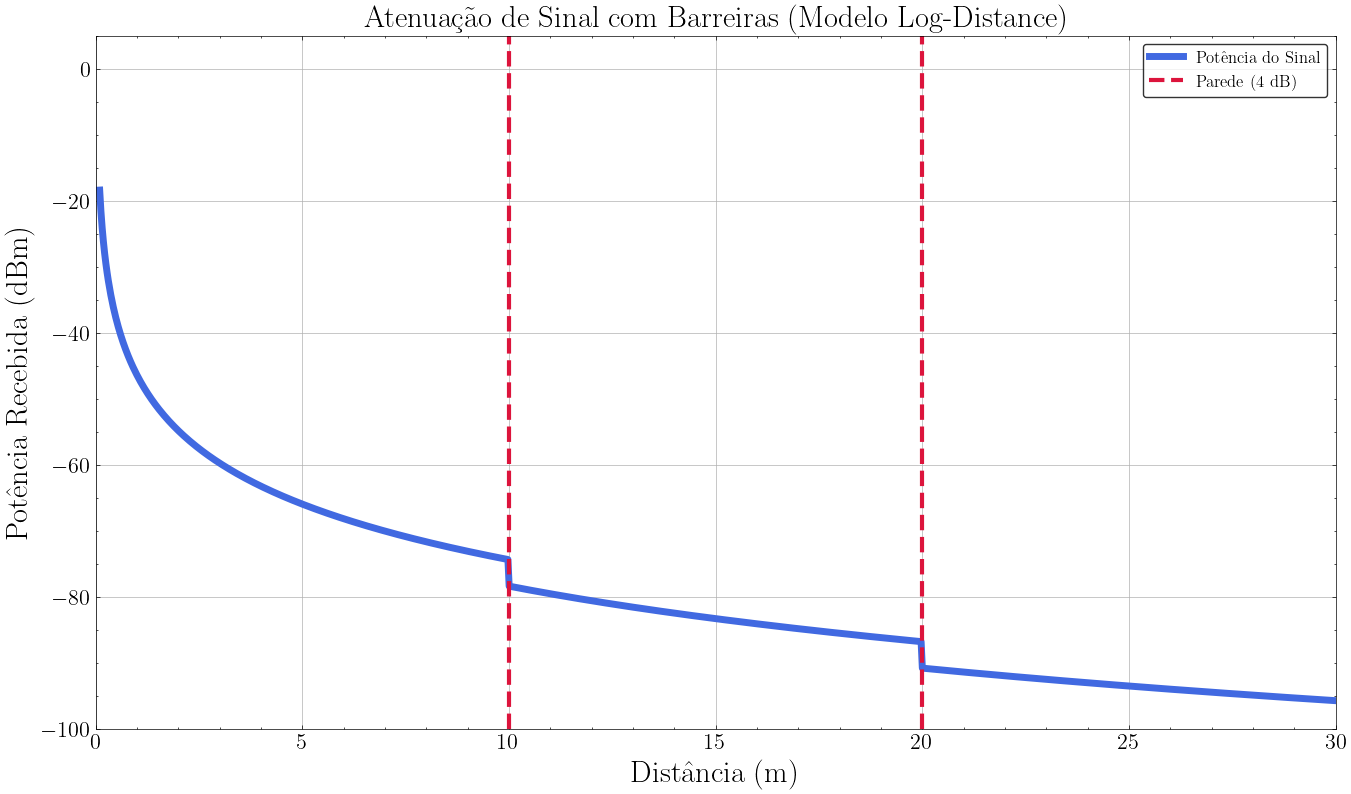

In [11]:

# === Gráfico ===
fig, ax = plt.subplots()

ax.plot(distances, signal_strengths, label='Potência do Sinal', color='royalblue', linewidth=5)

# Paredes verticais e anotações
for i, wall_pos in enumerate(WALL_LOCATIONS):
    label = f'Parede ({WALL_ATTENUATION_DB} dB)' if i == 0 else "_nolegend_"
    ax.axvline(x=wall_pos, color='crimson', linestyle='--', linewidth=3, label=label)
    
    idx_after = np.where(distances >= wall_pos)[0][0]
    power_after = signal_strengths[idx_after]

# Configurações do gráfico
ax.set_xlabel("Distância (m)")
ax.set_ylabel("Potência Recebida (dBm)")
ax.set_title("Atenuação de Sinal com Barreiras (Modelo Log-Distance)")
ax.set_xlim(0, MAX_DISTANCE_METERS)
ax.set_ylim(-100, TX_POWER_DBM + 5)
ax.grid(True)
plt.legend(
            loc='upper right',
            frameon=True,
            edgecolor='black',
            facecolor='white',
            fontsize=12,
            fancybox=True
        )

# --- Salvar o Gráfico ---
output_path = './out/signal_attenuation.png'
plt.savefig(output_path, dpi=300)
print(f"Gráfico salvo em: {output_path}")

plt.show()
